In [9]:
import pandas as pd
import yaml
import random
import sys
import matplotlib.pyplot as plt

from pathlib import Path
from tqdm.notebook import tqdm

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

params = yaml.safe_load(open('../params.yaml'))['davies_bouldin']
random.seed(params['seed'])

In [10]:
# input_file = Path(sys.argv[1])
input_file = '../data/prepared/minmax_data.csv'
output_file = '../data/prepared/db_score.txt'

Path('../data/prepared').mkdir(parents=True, exist_ok=True)

df = pd.read_csv(input_file, sep=',', index_col=None)

if df.columns[0] == "id":
    df=df.drop("id", axis=1)
if df.columns[0] == "Unnamed: 0":
    df=df.drop("Unnamed: 0", axis=1)

cols = df.columns

df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0.470880,0.385799,0.562361,0.546940,0.431504,0.558689,0.804339,0.06250,0.433333,0.318182,...,0.467078,0.435327,0.428585,0.431881,0.656229,0.450930,0.546854,0.603894,0.605064,0.557570
1,0.438371,0.439604,0.562946,0.595238,0.335748,0.573136,0.540179,0.06250,0.100000,0.136364,...,0.472326,0.508380,0.309548,0.450616,0.608434,0.623499,0.446892,0.453613,0.543135,0.306763
2,0.600831,0.530897,0.358769,0.402646,0.540544,0.564273,0.773949,0.15625,0.366667,0.113636,...,0.473940,0.342750,0.656568,0.757268,0.570082,0.367093,0.397413,0.605750,0.428078,0.238558
3,0.458790,0.519696,0.519301,0.504429,0.576596,0.341746,0.565985,0.18750,0.066667,0.295455,...,0.583177,0.659253,0.579803,0.590711,0.433370,0.602681,0.331975,0.469007,0.500973,0.516282
4,0.440320,0.370937,0.459521,0.259276,0.494476,0.271661,0.638294,0.25000,0.233333,0.113636,...,0.345402,0.470595,0.555270,0.534534,0.405619,0.604864,0.392484,0.624310,0.476586,0.356527


  0%|          | 0/13 [00:00<?, ?it/s]

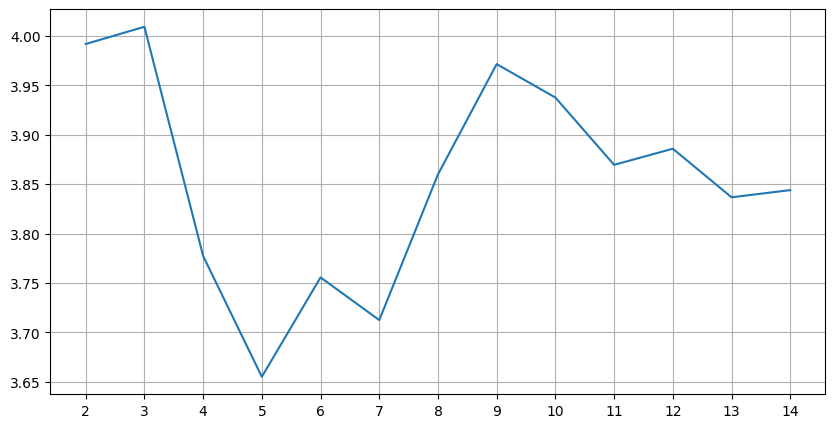

In [11]:
k_range = range(params["range_x"], params["range_y"])

scores = []

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df)
    score = davies_bouldin_score(df, labels)
    scores.append((k, score))   

ax_x, ax_y = zip(*scores)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.xticks(k_range)
plt.grid()
plt.plot(ax_x, ax_y)

In [17]:
best_score = min(scores, key=lambda x: x[1])[0]
best_score

5

In [20]:
with open(output_file, 'w') as of:
    of.write(str(best_score))